# Decision tree classifier from scratch

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
import graphviz
import sys
sys.path.insert(0, 'C:/Users/grzesiek/Documents/Data Science/PycharmProjects/ML_from_scratch/Decision_tree_classyfier')

In [2]:
from decision_tree_clf import entropy, accuracy, Node, DecisionTreeCls

## Toy dataset

In [3]:
X = np.array([[1, 30], [1, 15], [1, 5], [0, 10], [0, 5], [0,15], [0, 20], [0, 25], [0, 30], [0,30]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [4]:
clf = DecisionTreeCls(max_depth=3)
clf.fit(X, y)
clf.export_text(['rain', 'time_walk'])

Root node: n_samples = 10, 
            splitting_feature = time_walk, 
            splitting_threshold = 10
|--- Node right: n_samples = 7, 
            splitting_feature = rain, 
            splitting_threshold = 0
|   |--- Leaf node right: 0
|   |--- Leaf node left: 1
|--- Leaf node left: 0


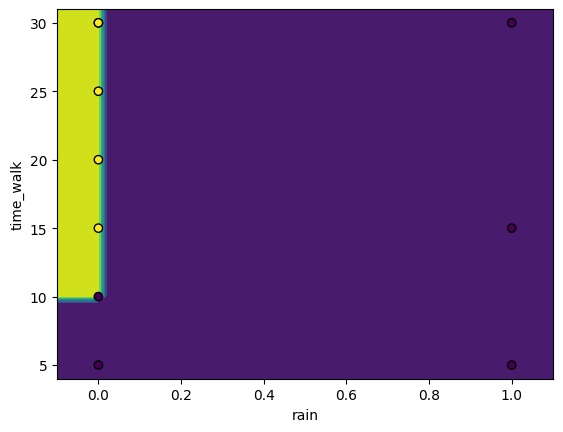

In [38]:
feature_1, feature_2 = np.meshgrid(np.linspace(X[:, 0].min()-0.1, X[:, 0].max()+0.1),
                                   np.linspace(X[:, 1].min()-2, X[:, 1].max())+1)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
tree = clf.fit(X, y)
y_pred = np.reshape(clf.predict(grid), feature_1.shape)

display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred, ylabel='time_walk', xlabel='rain')
display.plot()
display.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black");

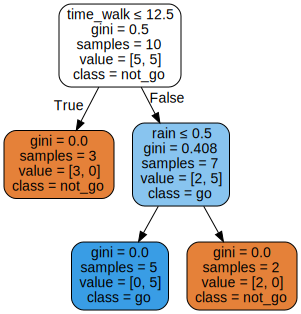

In [39]:
# clf_sklearn = DecisionTreeClassifier()
clf_sklearn = clf_sklearn.fit(X, y)

dot_data = export_graphviz(clf_sklearn, out_file=None, 
                      feature_names=['rain', 'time_walk'],  
                      class_names=['not_go', 'go'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

## Breast_cancer dataset

In [7]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
clf = DecisionTreeCls(max_depth=3)
clf.fit(X_train, y_train)
clf.export_text(data['feature_names'])

Root node: n_samples = 455, 
            splitting_feature = mean concave points, 
            splitting_threshold = 0.04908
|--- Node right: n_samples = 177, 
            splitting_feature = worst area, 
            splitting_threshold = 861.5
|   |--- Leaf node right: 0
|   |--- Node left: n_samples = 48, 
            splitting_feature = worst texture, 
            splitting_threshold = 25.4
|   |   |--- Leaf node right: 0
|   |   |--- Leaf node left: 1
|--- Node left: n_samples = 278, 
            splitting_feature = worst area, 
            splitting_threshold = 928.2
|   |--- Node right: n_samples = 13, 
            splitting_feature = mean texture, 
            splitting_threshold = 19.46
|   |   |--- Leaf node right: 0
|   |   |--- Leaf node left: 1
|   |--- Node left: n_samples = 265, 
            splitting_feature = compactness error, 
            splitting_threshold = 0.01202
|   |   |--- Leaf node right: 1
|   |   |--- Leaf node left: 1


In [9]:
clf.feature_importance(data['feature_names']).sort_values(by='feature_importance', ascending=False).style.bar('feature_importance')

,feature_name,feature_importance
4,mean texture,0.661226
0,mean concave points,0.581235
2,worst texture,0.520057
1,worst area,0.286436
3,worst area,0.110114
5,compactness error,0.018576


In [10]:
y_pred = clf.predict(X_test)
accuracy(y_test, y_pred)

0.9122807017543859

# Decision tree classifier from sklearn

## Parameters

In [12]:
parameters={
    'criterion':'entropy',# {“gini”, “entropy”, “log_loss”}
    'splitter':'best', # {“best”, “random”}
    'max_depth': 3,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'min_weight_fraction_leaf': 0.0,
    'max_features': None, # int, float or {“auto”, “sqrt”, “log2”}, default=None
    'random_state': None, # int, RandomState instance or None, default=None
    'max_leaf_nodes': None, # int, default=None
    'min_impurity_decrease': 0.0, # float, default=0.0
    'class_weight': None, # dict, list of dict or “balanced”, default=None
    'ccp_alpha': 0.0, # non-negative float, default=0.0
}

clf = DecisionTreeClassifier(
    criterion=parameters['criterion'],
    splitter=parameters['splitter'], 
    max_depth=parameters['max_depth'],
    min_samples_split=parameters['min_samples_split'],
    min_samples_leaf=parameters['min_samples_leaf'],
    min_weight_fraction_leaf=parameters['min_weight_fraction_leaf'],
    max_features=parameters['max_features'],
    random_state=parameters['random_state'],
    max_leaf_nodes=parameters['max_leaf_nodes'],
    min_impurity_decrease=parameters['min_impurity_decrease'],
    class_weight=parameters['class_weight'],
    ccp_alpha=parameters['ccp_alpha']
    )
clf = clf.fit(X_train, y_train)

## Attributes

In [13]:
# attributes:
atts = {att for att in dir(clf) if (att[-1]=='_') & (att[0]!='_')}
print('Attributes of tree:', atts)

Attributes of tree: {'feature_importances_', 'classes_', 'n_classes_', 'max_features_', 'n_features_', 'n_features_in_', 'n_outputs_', 'tree_'}


In [15]:
# feature importance
df=pd.DataFrame(np.transpose([clf.feature_importances_]), index=data['feature_names'], columns=['feature_importance'])

filt = df['feature_importance']>0
(df[filt]).sort_values(by='feature_importance', ascending=False).style.bar("feature_importance")

,feature_importance
mean concave points,0.688247
worst area,0.211608
worst texture,0.064964
mean texture,0.022370
compactness error,0.012811


In [16]:
# scalar attributes
for att, val in clf.__dict__.items():
    if att in atts-{'tree_', 'feature_importances_'}:
        print(att,'=', val)

n_features_in_ = 30
n_outputs_ = 1
classes_ = [0 1]
n_classes_ = 2
max_features_ = 30


In [18]:
# tree attributes
print(dir(clf.tree_))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', 'apply', 'capacity', 'children_left', 'children_right', 'compute_feature_importances', 'compute_partial_dependence', 'decision_path', 'feature', 'impurity', 'max_depth', 'max_n_classes', 'n_classes', 'n_features', 'n_leaves', 'n_node_samples', 'n_outputs', 'node_count', 'predict', 'threshold', 'value', 'weighted_n_node_samples']


## Methods

In [17]:
meths = ['apply', 
         'cost_complexity_pruning_path',
         'decision_path',
         'get_depth', 
         'get_n_leaves',
         'get_params',
         'predict',
         'predict_log_proba',
         'predict_proba',
         'score',
         'set_params']
meths

['apply',
 'cost_complexity_pruning_path',
 'decision_path',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params']

In [18]:
clf.apply(X_test[[2],:])

array([3], dtype=int64)

In [19]:
print(clf.decision_path(X_test[[2],:]))

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1


In [20]:
clf.get_depth()

3

In [21]:
clf.get_n_leaves()

7

In [22]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [23]:
clf.predict(X_test[[2],:])

array([1])

In [24]:
clf.predict_log_proba(X_test[[2],:])

array([[-3.35573501, -0.03550669]])

In [25]:
clf.predict_proba(X_test[[2, 3],:])

array([[0.03488372, 0.96511628],
       [0.        , 1.        ]])

In [26]:
clf.score(X_test,y_test)

0.9210526315789473

## Display

In [27]:
text = export_text(clf, feature_names=list(data['feature_names']))
print(text)

|--- mean concave points <= 0.05
|   |--- worst area <= 929.80
|   |   |--- compactness error <= 0.01
|   |   |   |--- class: 1
|   |   |--- compactness error >  0.01
|   |   |   |--- class: 1
|   |--- worst area >  929.80
|   |   |--- mean texture <= 19.54
|   |   |   |--- class: 1
|   |   |--- mean texture >  19.54
|   |   |   |--- class: 0
|--- mean concave points >  0.05
|   |--- worst area <= 865.40
|   |   |--- worst texture <= 25.62
|   |   |   |--- class: 1
|   |   |--- worst texture >  25.62
|   |   |   |--- class: 0
|   |--- worst area >  865.40
|   |   |--- class: 0



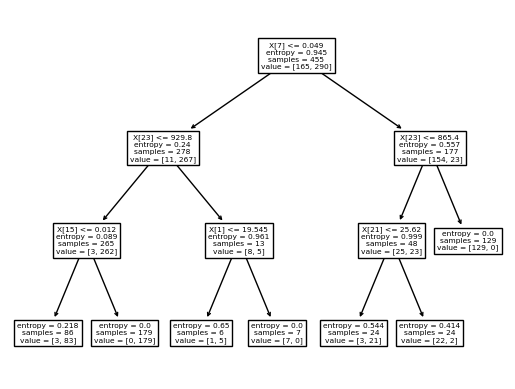

In [28]:
plot_tree(clf);

In [29]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

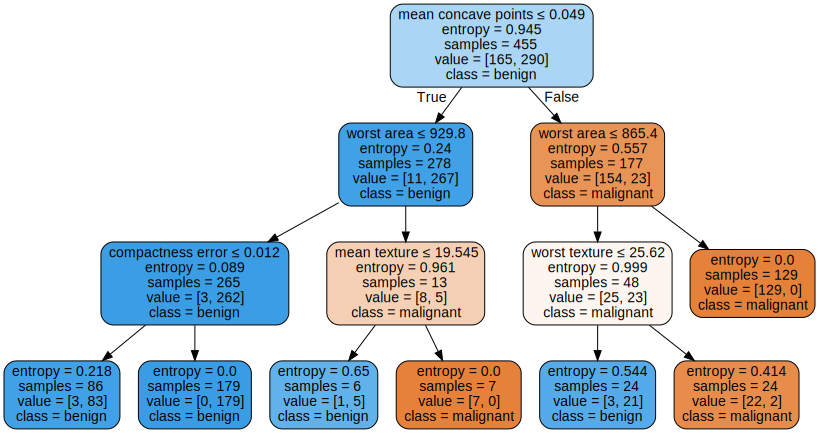

In [30]:
dot_data = export_graphviz(clf, out_file=None, 
                      feature_names=data.feature_names,  
                      class_names=data.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph